In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import KFold, StratifiedKFold
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
os.getcwd()

'C:\\Users\\Daniele\\PycharmProjects\\LipNetProve\\codesITA\\RATIO'

In [2]:
import os
os.chdir('../../DatasetITA-Ratio-BS/Train')
os.getcwd()

'C:\\Users\\Daniele\\PycharmProjects\\LipNetProve\\DatasetITA-Ratio-BS\\Train'

In [3]:
data=[]
for l in os.listdir():
    if '.DS_Store' not in l:
        os.chdir(l)
        for m in os.listdir():
            data.append([l+'/'+m, l])
        os.chdir('..')

In [4]:
data

[['a/BS_Word_a_02.png', 'a'],
 ['a/BS_Word_a_02_01.png', 'a'],
 ['a/BS_Word_a_02_02.png', 'a'],
 ['a/BS_Word_a_02_03.png', 'a'],
 ['a/BS_Word_a_07.png', 'a'],
 ['a/BS_Word_a_07_01.png', 'a'],
 ['a/BS_Word_a_07_02.png', 'a'],
 ['a/BS_Word_a_07_03.png', 'a'],
 ['b/BS_Word_b_02.png', 'b'],
 ['b/BS_Word_b_02_01.png', 'b'],
 ['b/BS_Word_b_02_02.png', 'b'],
 ['b/BS_Word_b_02_03.png', 'b'],
 ['b/BS_Word_b_07.png', 'b'],
 ['b/BS_Word_b_07_01.png', 'b'],
 ['b/BS_Word_b_07_02.png', 'b'],
 ['b/BS_Word_b_07_03.png', 'b'],
 ['c/BS_Word_c_02.png', 'c'],
 ['c/BS_Word_c_02_01.png', 'c'],
 ['c/BS_Word_c_02_02.png', 'c'],
 ['c/BS_Word_c_02_03.png', 'c'],
 ['c/BS_Word_c_07.png', 'c'],
 ['c/BS_Word_c_07_01.png', 'c'],
 ['c/BS_Word_c_07_02.png', 'c'],
 ['c/BS_Word_c_07_03.png', 'c'],
 ['d/BS_Word_d_02.png', 'd'],
 ['d/BS_Word_d_02_01.png', 'd'],
 ['d/BS_Word_d_02_02.png', 'd'],
 ['d/BS_Word_d_02_03.png', 'd'],
 ['d/BS_Word_d_07.png', 'd'],
 ['d/BS_Word_d_07_01.png', 'd'],
 ['d/BS_Word_d_07_02.png', 'd'],
 

In [5]:
os.getcwd()

'C:\\Users\\Daniele\\PycharmProjects\\LipNetProve\\DatasetITA-Ratio-BS\\Train'

In [6]:
len(data)

80

In [7]:
import csv
os.chdir('../../codesITA')
header = ['filename', 'label']

with open('training_labelsITA.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(data)

In [8]:
train_data = pd.read_csv('training_labelsITA.csv')
Y = train_data[['label']]

kf = KFold(n_splits = 5)

skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True)

In [9]:
idg = ImageDataGenerator(rescale=1./255)

In [10]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

In [11]:
def create_new_model():
    import os
    import numpy as np
    from keras.models import Sequential # To initialise the nn as a sequence of layers
    from keras.layers import Convolution2D # To make the convolution layer for 2D images
    from keras.layers import MaxPooling2D #
    from keras.layers import Flatten
    from keras.layers import Dense
    from keras.layers import Dropout
    from keras.callbacks import CSVLogger
    from tensorflow.keras.optimizers import RMSprop
    from keras.layers import BatchNormalization
    from tensorflow.keras.optimizers import Adam
    from keras.models import load_model
    from keras.callbacks import ModelCheckpoint
    from keras.layers import Activation
    from keras.layers import GlobalAveragePooling2D

    
    csv = CSVLogger("2_adam_30epochRatioBS.log")
    #filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
    #checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    # Initialising the CNN
    classifier = Sequential()

    # Step 1 - Convolution
    classifier.add(Convolution2D(32, (2, 2), input_shape=(224, 224, 1), activation='relu', strides=2, name='convo1'))
    #classifier.add(Convolution2D(64, (3, 3), activation='relu', name='convo2'))
    # Step 1 - Pooling
    classifier.add(MaxPooling2D(pool_size=(2, 2)))

    # Step 2 - Convolution
    classifier.add(Convolution2D(64, (3, 3), activation='relu', name='convo3'))
    # Step 2 - Pooling
    classifier.add(MaxPooling2D(pool_size=(2, 2)))
    # Step 3 - Convolution
    #classifier.add(Convolution2D(64, (3, 3), activation='relu', name='convo4'))
    # Step 3 - Pooling
    #classifier.add(MaxPooling2D(pool_size=(2, 2)))
    #Step 4 - Flattening

    classifier.add(Flatten())

    classifier.add(BatchNormalization())
    #classifier.add(Dropout((0.5)))
    classifier.add(Dense(512, activation='relu'))

    '''classifier.add(BatchNormalization())
    classifier.add(Dropout((0.5)))
    classifier.add(Dense(512, activation = 'relu'))
    '''

    classifier.add(BatchNormalization())
    #classifier.add(Dropout((0.4)))
    classifier.add(Dense(10, activation='softmax'))

    return classifier




Found 64 validated image filenames belonging to 10 classes.
Found 16 validated image filenames belonging to 10 classes.
Epoch 1/30
2/2 [==============================] - ETA: 0s - loss: 3.4660 - accuracy: 0.2188
Epoch 00001: val_accuracy improved from -inf to 0.12500, saving model to saved_models(30epoch)ITARATIOBS\model_1.h5
2/2 [==============================] - 2s 796ms/step - loss: 3.4660 - accuracy: 0.2188 - val_loss: 5.6032 - val_accuracy: 0.1250
Epoch 2/30
2/2 [==============================] - ETA: 0s - loss: 1.5975 - accuracy: 0.6875
Epoch 00002: val_accuracy did not improve from 0.12500
2/2 [==============================] - 1s 365ms/step - loss: 1.5975 - accuracy: 0.6875 - val_loss: 3.5964 - val_accuracy: 0.1250
Epoch 3/30
2/2 [==============================] - ETA: 0s - loss: 0.5842 - accuracy: 0.8906
Epoch 00003: val_accuracy did not improve from 0.12500
2/2 [==============================] - 1s 356ms/step - loss: 0.5842 - accuracy: 0.8906 - val_loss: 2.4051 - val_accuracy

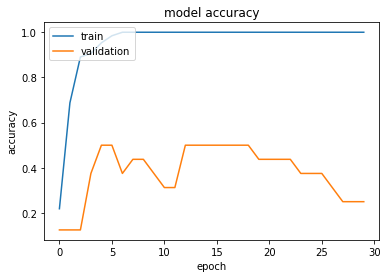

Found 64 validated image filenames belonging to 10 classes.
Found 16 validated image filenames belonging to 10 classes.
Epoch 1/30
2/2 [==============================] - ETA: 0s - loss: 3.2231 - accuracy: 0.2344
Epoch 00001: val_accuracy improved from -inf to 0.25000, saving model to saved_models(30epoch)ITARATIOBS\model_2.h5
2/2 [==============================] - 2s 896ms/step - loss: 3.2231 - accuracy: 0.2344 - val_loss: 2.9795 - val_accuracy: 0.2500
Epoch 2/30
2/2 [==============================] - ETA: 0s - loss: 1.2204 - accuracy: 0.7500
Epoch 00002: val_accuracy improved from 0.25000 to 0.31250, saving model to saved_models(30epoch)ITARATIOBS\model_2.h5
2/2 [==============================] - 1s 698ms/step - loss: 1.2204 - accuracy: 0.7500 - val_loss: 2.3588 - val_accuracy: 0.3125
Epoch 3/30
2/2 [==============================] - ETA: 0s - loss: 0.6309 - accuracy: 0.8438
Epoch 00003: val_accuracy did not improve from 0.31250
2/2 [==============================] - 1s 371ms/step - l

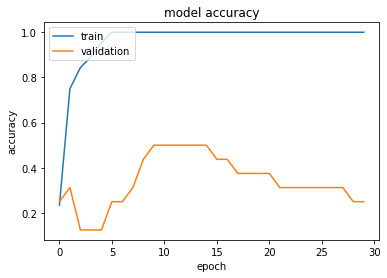

Found 64 validated image filenames belonging to 10 classes.
Found 16 validated image filenames belonging to 10 classes.
Epoch 1/30
2/2 [==============================] - ETA: 0s - loss: 5.9661 - accuracy: 0.1250
Epoch 00001: val_accuracy improved from -inf to 0.12500, saving model to saved_models(30epoch)ITARATIOBS\model_3.h5
2/2 [==============================] - 2s 800ms/step - loss: 5.9661 - accuracy: 0.1250 - val_loss: 12.0865 - val_accuracy: 0.1250
Epoch 2/30
2/2 [==============================] - ETA: 0s - loss: 3.7198 - accuracy: 0.4375
Epoch 00002: val_accuracy did not improve from 0.12500
2/2 [==============================] - 1s 401ms/step - loss: 3.7198 - accuracy: 0.4375 - val_loss: 6.2352 - val_accuracy: 0.1250
Epoch 3/30
2/2 [==============================] - ETA: 0s - loss: 1.9738 - accuracy: 0.6562
Epoch 00003: val_accuracy improved from 0.12500 to 0.18750, saving model to saved_models(30epoch)ITARATIOBS\model_3.h5
2/2 [==============================] - 1s 705ms/step - 

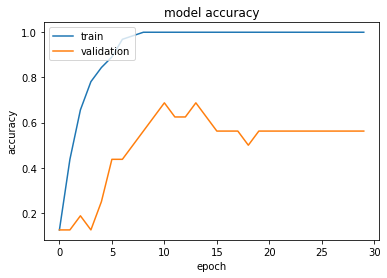

Found 64 validated image filenames belonging to 10 classes.
Found 16 validated image filenames belonging to 10 classes.
Epoch 1/30
2/2 [==============================] - ETA: 0s - loss: 3.7174 - accuracy: 0.1719
Epoch 00001: val_accuracy improved from -inf to 0.25000, saving model to saved_models(30epoch)ITARATIOBS\model_4.h5
2/2 [==============================] - 2s 791ms/step - loss: 3.7174 - accuracy: 0.1719 - val_loss: 4.3582 - val_accuracy: 0.2500
Epoch 2/30
2/2 [==============================] - ETA: 0s - loss: 1.6725 - accuracy: 0.6094
Epoch 00002: val_accuracy did not improve from 0.25000
2/2 [==============================] - 1s 399ms/step - loss: 1.6725 - accuracy: 0.6094 - val_loss: 2.8406 - val_accuracy: 0.2500
Epoch 3/30
2/2 [==============================] - ETA: 0s - loss: 0.7699 - accuracy: 0.7656
Epoch 00003: val_accuracy improved from 0.25000 to 0.37500, saving model to saved_models(30epoch)ITARATIOBS\model_4.h5
2/2 [==============================] - 1s 686ms/step - l

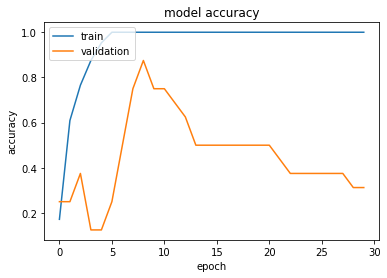

Found 64 validated image filenames belonging to 10 classes.
Found 16 validated image filenames belonging to 10 classes.
Epoch 1/30
2/2 [==============================] - ETA: 0s - loss: 4.1347 - accuracy: 0.2188
Epoch 00001: val_accuracy improved from -inf to 0.12500, saving model to saved_models(30epoch)ITARATIOBS\model_5.h5
2/2 [==============================] - 2s 819ms/step - loss: 4.1347 - accuracy: 0.2188 - val_loss: 3.0366 - val_accuracy: 0.1250
Epoch 2/30
2/2 [==============================] - ETA: 0s - loss: 1.7874 - accuracy: 0.6562
Epoch 00002: val_accuracy improved from 0.12500 to 0.37500, saving model to saved_models(30epoch)ITARATIOBS\model_5.h5
2/2 [==============================] - 1s 662ms/step - loss: 1.7874 - accuracy: 0.6562 - val_loss: 2.5315 - val_accuracy: 0.3750
Epoch 3/30
2/2 [==============================] - ETA: 0s - loss: 0.8057 - accuracy: 0.8125
Epoch 00003: val_accuracy improved from 0.37500 to 0.50000, saving model to saved_models(30epoch)ITARATIOBS\mod

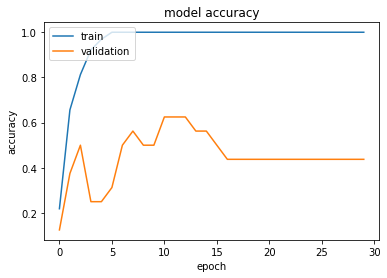

In [12]:
VALIDATION_ACCURACY = []
VALIDATION_LOSS = []

save_dir = 'saved_models(30epoch)ITARATIOBS/'
fold_var = 1

for train_index, val_index in skf.split(np.zeros(len(data)),Y):
    training_data = train_data.iloc[train_index]
    validation_data = train_data.iloc[val_index]

    train_data_generator = idg.flow_from_dataframe(training_data, directory = '../DatasetITA-Ratio-BS/Train',
                               x_col = "filename", y_col = "label",
                               class_mode = "categorical", shuffle = True, color_mode="grayscale",target_size=(224,224),batchsize=32)
    valid_data_generator  = idg.flow_from_dataframe(validation_data, directory =  '../DatasetITA-Ratio-BS/Train',
                            x_col = "filename", y_col = "label",
                            class_mode = "categorical", shuffle = True, color_mode="grayscale",target_size=(224,224),batchsize=32)

    # CREATE NEW MODEL
    model = create_new_model()
    # COMPILE NEW MODEL
    model.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

    # CREATE CALLBACKS
    checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+get_model_name(fold_var),
                            monitor='val_accuracy', verbose=1,
                            save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    # There can be other callbacks, but just showing one because it involves the model name
    # This saves the best model
    # FIT THE MODEL
    h = model.fit(train_data_generator,
                epochs=30,
                callbacks=callbacks_list,
                validation_data=valid_data_generator)
    #PLOT HISTORY
    #:
    #:

    # LOAD BEST MODEL to evaluate the performance of the model
    model.load_weights("saved_models(30epoch)ITARATIOBS/model_"+str(fold_var)+".h5")
    

    results = model.evaluate(valid_data_generator)
    results = dict(zip(model.metrics_names,results))

    VALIDATION_ACCURACY.append(results['accuracy'])
    VALIDATION_LOSS.append(results['loss'])

    plt.plot(h.history['accuracy']) #validation
    plt.plot(h.history['val_accuracy']) #train
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    tf.keras.backend.clear_session()

    fold_var += 1

In [13]:
VALIDATION_ACCURACY

[0.5, 0.5, 0.6875, 0.875, 0.625]

In [14]:
VALIDATION_LOSS

[1.8760294914245605,
 1.7586591243743896,
 1.7219364643096924,
 1.5915343761444092,
 1.7966220378875732]